# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   June-2014

In [1]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


## Generate and show the data

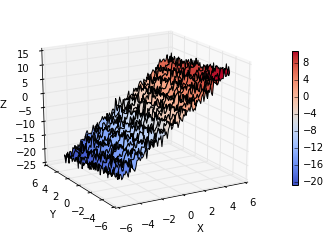

In [2]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [3]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[ -6.98032768e+12  -2.65987083e+12   1.60245807e+12 ...,  -5.14343460e+12
    7.29084644e+12   7.47760359e+12]
 [  4.39137053e+12  -8.16504700e+12   9.31911298e+10 ...,  -1.01916591e+13
    1.16309820e+13  -6.61563108e+12]
 [  1.41447062e+13   1.28107893e+13  -5.08914715e+12 ...,   2.33144606e+13
    5.83657347e+12   2.77540033e+13]
 ..., 
 [ -8.00612676e+11  -6.58176546e+11   6.62105121e+12 ...,   4.39668640e+12
   -4.59576917e+12   1.14647170e+11]
 [ -3.82307636e+12  -1.27465950e+12  -3.55659992e+12 ...,  -3.89494374e+12
   -2.91747662e+12   2.25241340e+12]
 [ -1.01834632e+12  -4.44094374e+11   1.96744496e+12 ...,  -1.29413462e+12
   -8.01872046e+11  -1.17761181e+12]]


## Multilinear regression model

In [4]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.969e+05
Date:                Sun, 01 Nov 2015   Prob (F-statistic):               0.00
Time:                        18:45:46   Log-Likelihood:                -14512.
No. Observations:               10201   AIC:                         2.903e+04
Df Residuals:                   10198   BIC:                         2.905e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.9808      0.010   -501.159      0.0